# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [48]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib.plots.data import (DataPlotType, stack)
from lib.data.func import (DataFunc)
from lib.data.schema import (DataType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [6]:
def φ_labels(φ):
    return [r"$\varphi=$"+f"{numpy.array2string(f, precision=2, separator=',')}" for f in φ]

## Simulations

In [49]:
nsample = 1000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

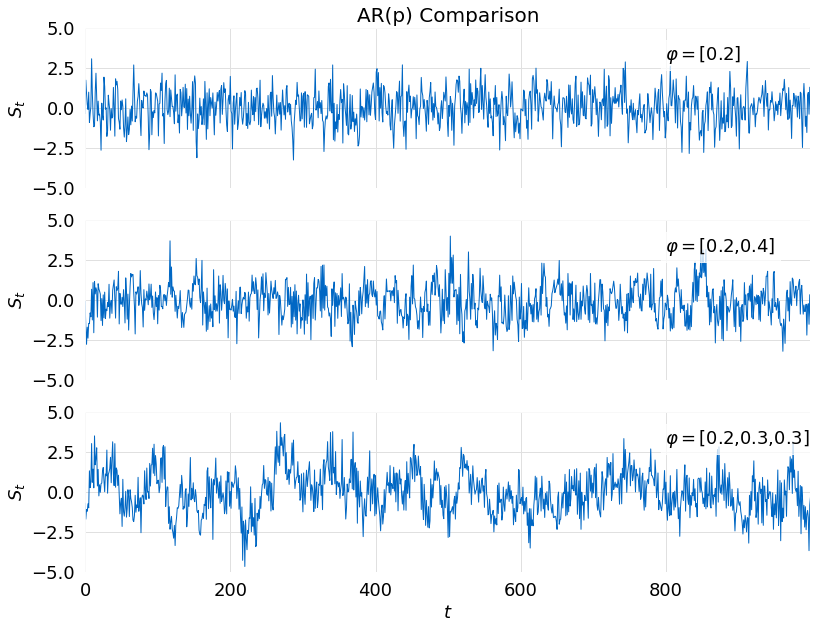

In [52]:
labels = φ_labels([φ1, φ2, φ3])
title = "AR(p) Comparison"
samples = [ar1, ar2, ar3]
stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [53]:
df = DataFunc.apply_func_type(ar1, DataType.PACF, nlags=1)
df["PACF"][1]

0.22677580355355942

In [54]:
result = arima.ar_fit(ar1, 1)

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1437.715
Date:                Fri, 06 May 2022   AIC                           2881.431
Time:                        07:40:59   BIC                           2896.154
Sample:                             0   HQIC                          2887.026
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0567      0.042      1.356      0.175      -0.025       0.139
ar.L1          0.2266      0.031      7.394      0.000       0.167       0.287
sigma2         1.0382      0.048     21.662      0.000       0.944       1.132
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.27
Prob(Q):                              0.94   Prob(JB):                         0.32
Heteroskedasticity (H):               0.95   Skew:                            -0.10
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
ar1.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2]), 'θ': [], 'σ': 1.0, 'μ': 0.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.05665624536932033, 0.041786893312883384],
    'Parameters': [[0.2266106045819656, 0.030648312480951644]],
    'Sigma2': [1.0382053031456218, 0.04792760595045777]}},
  'Tests': {}},
 'Date': '06/05/2022 07:40:12',
 'Name': 'ARMA-Simulation-0c588a3b-ecea-4f87-8326-d7c53b627e04'}

### AR(2) Example $\varphi = [0.2, 0.4]$

In [73]:
df = DataFunc.apply_func_type(ar2, DataType.PACF, nlags=2)
df["PACF"][1:3]

1    0.159834
2    0.384434
Name: PACF, dtype: float64

In [60]:
result = arima.ar_fit(ar2, 2)

In [61]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1390.057
Date:                Fri, 06 May 2022   AIC                           2788.114
Time:                        07:49:24   BIC                           2807.745
Sample:                             0   HQIC                          2795.575
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1166      0.067     -1.731      0.083      -0.249       0.015
ar.L1          0.1593      0.030      5.367      0.000       0.101       0.218
ar.L2          0.3849      0.029     13.151      0.000       0.327       0.442
sigma2         0.9435      0.043     21.843      0.000       0.859       1.028
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.73   Prob(JB):                         0.76
Heteroskedasticity (H):               0.97   Skew:                             0.04
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
ar2.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.4]),
   'θ': [],
   'σ': 1.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(2,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(2)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.116596343566177, 0.06735602120384915],
    'Parameters': [[0.15933705500948295, 0.029690438480458412],
     [0.38485469692748603, 0.02926473984620184]],
    'Sigma2': [0.9434974341695873, 0.04319403342683278]}},
  'Tests': {}},
 'Date': '06/05/2022 07:40:12',
 'Name': 'ARMA-Simulation-cc9e9c92-6484-463b-bb96-68934b90073c'}

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [75]:
df = DataFunc.apply_func_type(ar3, DataType.PACF, nlags=3)
df["PACF"][1:4]

1    0.149664
2    0.339744
3    0.301149
Name: PACF, dtype: float64

In [77]:
result = arima.ar_fit(ar3, 3)

In [78]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1431.224
Date:                Fri, 06 May 2022   AIC                           2872.448
Time:                        07:57:55   BIC                           2896.986
Sample:                             0   HQIC                          2881.774
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0367      0.155     -0.237      0.813      -0.340       0.267
ar.L1          0.1466      0.031      4.711      0.000       0.086       0.208
ar.L2          0.3396      0.029     11.738      0.000       0.283       0.396
ar.L3          0.3061      0.031      9.976      0.000       0.246       0.366
sigma2         1.0239      0.049     20.956      0.000       0.928       1.120
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.90   Prob(JB):                         0.12
Heteroskedasticity (H):               0.99   Skew:                             0.13
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
ar3.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.3, 0.3]),
   'θ': [],
   'σ': 1.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(3,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.0366854853465707, 0.15485936004492096],
    'Parameters': [[0.14663521994099865, 0.031128552219765016],
     [0.3395846229718862, 0.02893036274619514],
     [0.3061290728600482, 0.03068740938742761]],
    'Sigma2': [1.0238870622113343, 0.048859083379277524]}},
  'Tests': {}},
 'Date': '06/05/2022 07:40:12',
 'Name': 'ARMA-Simulation-f81b5126-2af6-4ae9-b722-c4d75c378f5f'}

## Simulations $\sigma = 5.0$

In [80]:
nsample = 10000
σ = 5.0

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample, σ)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample, σ)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample, σ)

In [ ]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-15.0, 15.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

### AR(1) Example ($\varphi = 0.2$)

In [81]:
df = DataFunc.apply_func_type(ar1, DataType.PACF, nlags=1)
df["PACF"][1]

0.19700353150596758

In [82]:
result = arima.ar_fit(ar1, 1)

In [83]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -30392.285
Date:                Fri, 06 May 2022   AIC                          60790.571
Time:                        07:59:52   BIC                          60812.202
Sample:                             0   HQIC                         60797.892
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0579      0.063     -0.920      0.358      -0.181       0.065
ar.L1          0.1970      0.010     19.701      0.000       0.177       0.217
sigma2        25.5500      0.365     70.015      0.000      24.835      26.265
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.90   Prob(JB):                         0.61
Heteroskedasticity (H):               0.91   Skew:                            -0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
ar1.attrs

{'S(t)': {'npts': 10000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2]), 'θ': [], 'σ': 5.0, 'μ': 0.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.05791960416214798, 0.06295557029738051],
    'Parameters': [[0.19698219307189369, 0.009998504827455793]],
    'Sigma2': [25.54995371737415, 0.3649186414738336]}},
  'Tests': {}},
 'Date': '06/05/2022 07:59:02',
 'Name': 'ARMA-Simulation-bc02b5c4-6c99-4b4d-addb-d692472657a5'}

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [85]:
df = DataFunc.apply_func_type(ar2, DataType.PACF, nlags=2)
df["PACF"][1:3]

1    0.193616
2    0.401239
Name: PACF, dtype: float64

In [87]:
result = arima.ar_fit(ar2, 2)

In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -30245.071
Date:                Fri, 06 May 2022   AIC                          60498.141
Time:                        08:01:27   BIC                          60526.983
Sample:                             0   HQIC                         60507.904
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1538      0.123      1.251      0.211      -0.087       0.395
ar.L1          0.1936      0.009     20.922      0.000       0.175       0.212
ar.L2          0.4012      0.009     44.225      0.000       0.383       0.419
sigma2        24.8074      0.349     71.153      0.000      24.124      25.491
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.89   Prob(JB):                         0.48
Heteroskedasticity (H):               1.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
ar2.attrs

{'S(t)': {'npts': 10000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.4]),
   'θ': [],
   'σ': 5.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(2,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(2)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.15375700905941933, 0.12293340414934234],
    'Parameters': [[0.19360969334837672, 0.009253840411098821],
     [0.4012424227806347, 0.00907284486502802]],
    'Sigma2': [24.807394350967314, 0.34864797562486405]}},
  'Tests': {}},
 'Date': '06/05/2022 07:59:02',
 'Name': 'ARMA-Simulation-5058953b-d1e7-4907-91f5-3d182e74aa7b'}

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [92]:
df = DataFunc.apply_func_type(ar3, DataType.PACF, nlags=3)
df["PACF"][1:4]

1    0.200636
2    0.292579
3    0.301547
Name: PACF, dtype: float64

In [93]:
result = arima.ar_fit(ar3, 3)

In [96]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -30215.457
Date:                Fri, 06 May 2022   AIC                          60440.914
Time:                        08:10:25   BIC                          60476.966
Sample:                             0   HQIC                         60453.118
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1185      0.242     -0.490      0.624      -0.593       0.355
ar.L1          0.2005      0.010     20.927      0.000       0.182       0.219
ar.L2          0.2926      0.009     31.386      0.000       0.274       0.311
ar.L3          0.3017      0.010     31.229      0.000       0.283       0.321
sigma2        24.6544      0.347     70.984      0.000      23.974      25.335
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.96   Prob(JB):                         0.93
Heteroskedasticity (H):               1.03   Skew:                             0.01
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
ar3.attrs

{'S(t)': {'npts': 10000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': array([0.2, 0.3, 0.3]),
   'θ': [],
   'σ': 5.0,
   'μ': 0.0,
   'γ': 0.0},
  'Description': 'ARIMA(3,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.1185124740711277, 0.24184195649031598],
    'Parameters': [[0.20050369815107844, 0.009581189113578893],
     [0.29257503649329114, 0.009321912981880362],
     [0.30168797261255603, 0.00966056424874258]],
    'Sigma2': [24.65438083504564, 0.34732121917116837]}},
  'Tests': {}},
 'Date': '06/05/2022 07:59:02',
 'Name': 'ARMA-Simulation-8243d42f-7ab6-4f7e-8ba6-741e99e0b3cd'}